In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

Using TensorFlow backend.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
X[0]

array([619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_Country = LabelEncoder()
X[:, 1] = labelencoder_X_Country.fit_transform(X[:, 1])
labelencoder_X_Gender = LabelEncoder()
X[:, 2] = labelencoder_X_Gender.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [4]:
X[0]

array([  0.00000000e+00,   0.00000000e+00,   6.19000000e+02,
         0.00000000e+00,   4.20000000e+01,   2.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.01348880e+05])

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
X_train[0]

array([ 1.76021608, -0.57468161, -0.73550706, -1.08726059,  0.01526571,
        0.00886037,  0.67316003,  2.53503394, -1.55362351, -1.03446007,
       -1.64080994])

In [8]:
#Creating the ANN architecture
classifier = Sequential()
#Adding the input layer and first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation='relu', input_dim = 11))
#Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation='relu'))
#Adding output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation='sigmoid'))

In [9]:
#Compiling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
#Fitting the training set
history = classifier.fit(x=X_train, y=y_train, batch_size=10, epochs=150, validation_data=(X_test, y_test))

Train on 7500 samples, validate on 2500 samples
Epoch 1/150
7500/7500 [==============================] - 1s 167us/step - loss: 0.6165 - acc: 0.7963 - val_loss: 0.5440 - val_acc: 0.8168
Epoch 2/150
7500/7500 [==============================] - 1s 111us/step - loss: 0.4295 - acc: 0.8263 - val_loss: 0.4053 - val_acc: 0.8304
Epoch 3/150
7500/7500 [==============================] - 1s 107us/step - loss: 0.4067 - acc: 0.8307 - val_loss: 0.3981 - val_acc: 0.8344
Epoch 4/150
7500/7500 [==============================] - 1s 109us/step - loss: 0.3994 - acc: 0.8317 - val_loss: 0.3927 - val_acc: 0.8316
Epoch 5/150
7500/7500 [==============================] - 1s 111us/step - loss: 0.3914 - acc: 0.8321 - val_loss: 0.3859 - val_acc: 0.8328
Epoch 6/150
7500/7500 [==============================] - 1s 105us/step - loss: 0.3836 - acc: 0.8347 - val_loss: 0.3772 - val_acc: 0.8324
Epoch 7/150
7500/7500 [==============================] - 1s 104us/step - loss: 0.3773 - acc: 0.8347 - val_loss: 0.3727 - val_acc: 

7500/7500 [==============================] - 1s 102us/step - loss: 0.3358 - acc: 0.8612 - val_loss: 0.3360 - val_acc: 0.8572
Epoch 61/150
7500/7500 [==============================] - 1s 103us/step - loss: 0.3346 - acc: 0.8621 - val_loss: 0.3340 - val_acc: 0.8560
Epoch 62/150
7500/7500 [==============================] - 1s 120us/step - loss: 0.3351 - acc: 0.8615 - val_loss: 0.3310 - val_acc: 0.8624
Epoch 63/150
7500/7500 [==============================] - 1s 110us/step - loss: 0.3355 - acc: 0.8591 - val_loss: 0.3364 - val_acc: 0.8624
Epoch 64/150
7500/7500 [==============================] - 1s 105us/step - loss: 0.3351 - acc: 0.8616 - val_loss: 0.3360 - val_acc: 0.8632
Epoch 65/150
7500/7500 [==============================] - 1s 102us/step - loss: 0.3344 - acc: 0.8625 - val_loss: 0.3323 - val_acc: 0.8628
Epoch 66/150
7500/7500 [==============================] - 1s 104us/step - loss: 0.3341 - acc: 0.8652 - val_loss: 0.3337 - val_acc: 0.8616
Epoch 67/150
7500/7500 [=======================

7500/7500 [==============================] - 1s 113us/step - loss: 0.3314 - acc: 0.8652 - val_loss: 0.3397 - val_acc: 0.8536
Epoch 120/150
7500/7500 [==============================] - 1s 112us/step - loss: 0.3319 - acc: 0.8637 - val_loss: 0.3350 - val_acc: 0.8572
Epoch 121/150
7500/7500 [==============================] - 1s 115us/step - loss: 0.3318 - acc: 0.8620 - val_loss: 0.3399 - val_acc: 0.8504
Epoch 122/150
7500/7500 [==============================] - 1s 101us/step - loss: 0.3321 - acc: 0.8625 - val_loss: 0.3331 - val_acc: 0.8612
Epoch 123/150
7500/7500 [==============================] - 1s 103us/step - loss: 0.3318 - acc: 0.8657 - val_loss: 0.3343 - val_acc: 0.8580
Epoch 124/150
7500/7500 [==============================] - 1s 103us/step - loss: 0.3318 - acc: 0.8629 - val_loss: 0.3349 - val_acc: 0.8604
Epoch 125/150
7500/7500 [==============================] - 1s 103us/step - loss: 0.3310 - acc: 0.8628 - val_loss: 0.3296 - val_acc: 0.8632
Epoch 126/150
7500/7500 [================

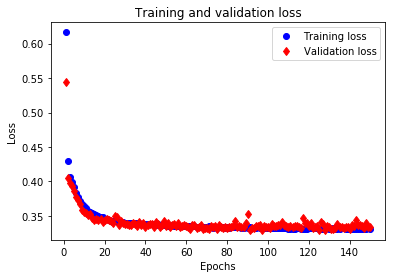

In [14]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'rd', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

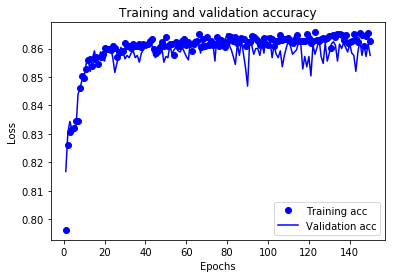

In [15]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
#Predicting:
y_pred = classifier.predict_proba(X_test)
y_pred_class = (y_pred>0.5)
y_pred
y_pred_class

array([[False],
       [False],
       [False],
       ..., 
       [False],
       [False],
       [False]], dtype=bool)

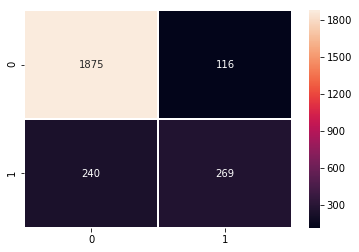

In [28]:
#Confusion Matrix
import seaborn as sns
from sklearn import metrics
conf = metrics.confusion_matrix(y_test, y_pred_class)
sns.heatmap(conf, annot=True, fmt="d", linewidths=.5)

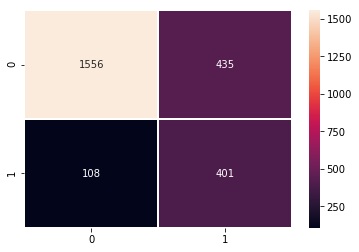

In [38]:
#since we care more about the customer who exit the bank than the ones who stay, we reduce the threshold to 20%
y_pred_class = (y_pred>0.2)
conf = metrics.confusion_matrix(y_test, y_pred_class)
sns.heatmap(conf, annot=True, fmt="d", linewidths=.5)